In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense,LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import seaborn as sns
import string
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM, GRU, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# Load datasets
supervised_data = pd.read_csv('/content/drive/MyDrive/clickbits/output.csv')
unsupervised_train = pd.read_json('/content/drive/MyDrive/clickbits/train.jsonl', lines=True)
unsupervised_val = pd.read_json('/content/drive/MyDrive/clickbits/validation (1).jsonl', lines=True)

In [20]:
import re

def clean_text(text):
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove multiple spaces
    text = text.lower().strip()  # Convert to lowercase and strip leading/trailing spaces
    return text

supervised_data[' title'] = supervised_data[' title'].apply(clean_text)


In [21]:
# Separate features and labels
X = supervised_data[' title']
y = supervised_data['label']

In [22]:
# Encode labels
#label_encoder = LabelEncoder()
#y = label_encoder.fit_transform(y)

# Split into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Split into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Define the maximum number of words and sequence length
max_words = 5000
max_sequence_length = 100

In [26]:
# Tokenization and padding
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)

In [27]:
from tensorflow.keras.regularizers import l2, l1_l2

In [28]:
# Build and compile the complex RNN model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128))
model.add(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(GRU(128, return_sequences=True, kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(SimpleRNN(64, kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Explicitly build the model by providing the input shape
model.build(input_shape=(None, max_sequence_length))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Now show the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 100, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 128)            │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 100, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 100, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 100, 128)            │          99,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 100, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 100, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 888,513 (3.39 MB)

 Trainable params: 887,873 (3.39 MB)

 Non-trainable params: 640 (2.50 KB)

In [29]:
#model.summary()

In [30]:
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
# Callbacks for early stopping and reducing learning rate
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

In [32]:
# Train the RNN model with validation data
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 94s 140ms/step - accuracy: 0.8384 - loss: 0.6908 - val_accuracy: 0.9322 - val_loss: 0.3549 - learning_rate: 0.0010
Epoch 2/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 147s 149ms/step - accuracy: 0.9779 - loss: 0.2281 - val_accuracy: 0.9615 - val_loss: 0.2010 - learning_rate: 0.0010
Epoch 3/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 138s 142ms/step - accuracy: 0.9838 - loss: 0.1385 - val_accuracy: 0.9322 - val_loss: 0.3135 - learning_rate: 0.0010
Epoch 4/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 90s 141ms/step - accuracy: 0.9881 - loss: 0.0830 - val_accuracy: 0.9426 - val_loss: 0.3012 - learning_rate: 0.0010
Epoch 5/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 140s 138ms/step - accuracy: 0.9935 - loss: 0.0587 - val_accuracy: 0.9703 - val_loss: 0.1495 - learning_rate: 2.0000e-04
Epoch 6/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 89s 139ms/step - accuracy: 0.9966 - loss: 0.0412 - val_accuracy: 0.9691 - val_loss: 0.1452 - learning_rate: 2.0000e-04
Epoch 7/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 141s 137ms/step - a

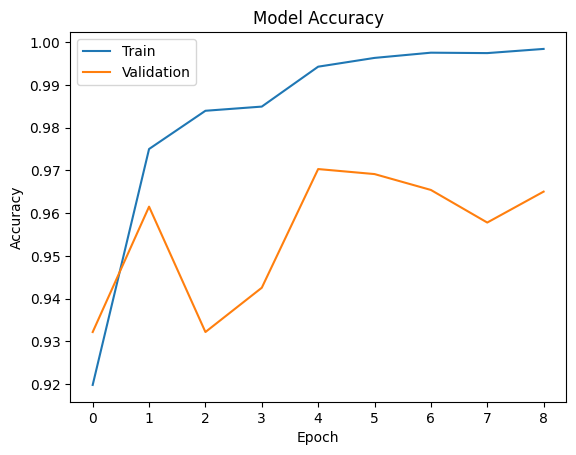

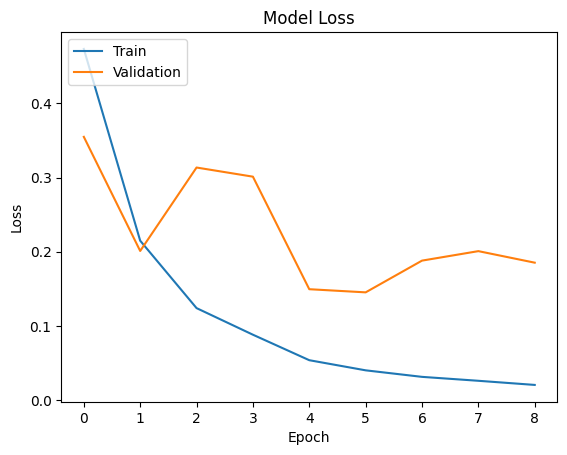

In [33]:
# Plotting accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [34]:

# Evaluate the RNN model on the test set
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test accuracy: {test_accuracy}")

200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.9672 - loss: 0.1577
Test accuracy: 0.9670209288597107


In [35]:
# Predict on the test set
y_test_pred_probs = model.predict(X_test_padded)
y_test_pred = (y_test_pred_probs > 0.5).astype(int).flatten()

200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step


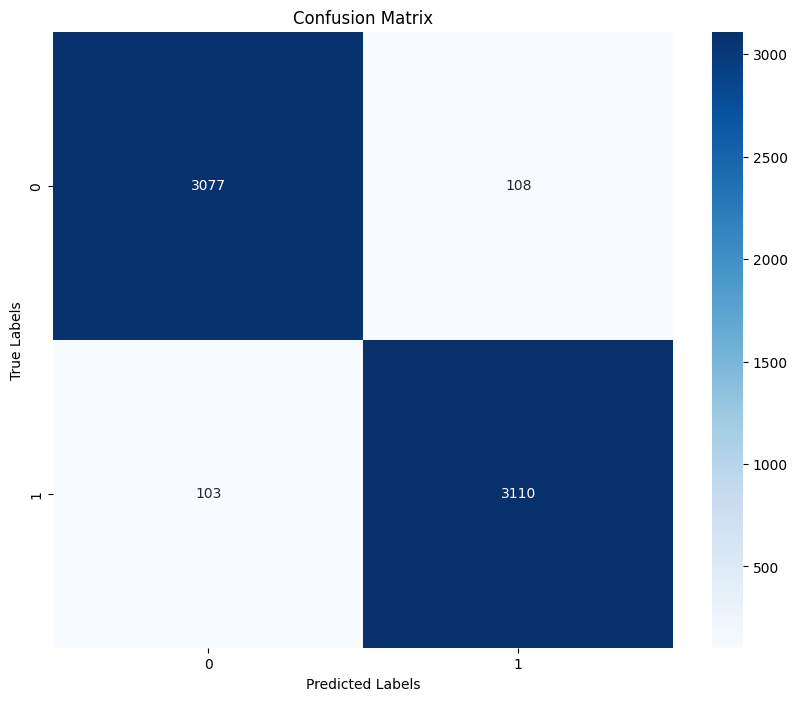

In [36]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [37]:
# Convert the column to string type to ensure consistency
unsupervised_train['postText'] = unsupervised_train['postText'].astype(str)
unsupervised_val['postText'] = unsupervised_val['postText'].astype(str)

In [38]:
unsupervised_train['postText'] = unsupervised_train['postText'].apply(clean_text)
unsupervised_val['postText'] = unsupervised_val['postText'].apply(clean_text)

In [39]:
# Extract relevant text features from the unsupervised datasets
X_unlabeled_train = unsupervised_train['postText']
X_unlabeled_val = unsupervised_val['postText']

In [40]:
# Tokenize and pad the unsupervised data
X_unlabeled_train_seq = tokenizer.texts_to_sequences(X_unlabeled_train)
X_unlabeled_val_seq = tokenizer.texts_to_sequences(X_unlabeled_val)
X_unlabeled_train_padded = pad_sequences(X_unlabeled_train_seq, maxlen=100)
X_unlabeled_val_padded = pad_sequences(X_unlabeled_val_seq, maxlen=100)

In [41]:
# Predict pseudo-labels for the unsupervised training data
pseudo_labels_train_probs = model.predict(X_unlabeled_train_padded)
pseudo_labels_train = (pseudo_labels_train_probs > 0.5).astype(int).flatten()

100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step


In [42]:
# Select high-confidence samples for self-training
confidence_threshold = 0.8
high_confidence_idx_train = pseudo_labels_train_probs.flatten() >= confidence_threshold

In [43]:
# Combine high-confidence pseudo-labeled data with original training data
X_combined_train1 = np.concatenate([X_train_padded, X_unlabeled_train_padded[high_confidence_idx_train]])
y_combined_train1 = np.concatenate([y_train, pseudo_labels_train[high_confidence_idx_train]])

In [44]:
# Retrain the model on the combined dataset
history_retraining=model.fit(X_combined_train1, y_combined_train1, epochs=10, batch_size=32, validation_split=0.2,callbacks=[early_stopping, reduce_lr])

Epoch 1/10
697/697 ━━━━━━━━━━━━━━━━━━━━ 101s 144ms/step - accuracy: 0.9951 - loss: 0.0441 - val_accuracy: 0.9794 - val_loss: 0.0965 - learning_rate: 1.0000e-04
Epoch 2/10
697/697 ━━━━━━━━━━━━━━━━━━━━ 140s 142ms/step - accuracy: 0.9966 - loss: 0.0354 - val_accuracy: 0.9799 - val_loss: 0.1057 - learning_rate: 1.0000e-04
Epoch 3/10
697/697 ━━━━━━━━━━━━━━━━━━━━ 137s 136ms/step - accuracy: 0.9968 - loss: 0.0272 - val_accuracy: 0.9786 - val_loss: 0.1078 - learning_rate: 1.0000e-04
Epoch 4/10
697/697 ━━━━━━━━━━━━━━━━━━━━ 142s 136ms/step - accuracy: 0.9971 - loss: 0.0243 - val_accuracy: 0.9736 - val_loss: 0.1255 - learning_rate: 1.0000e-04


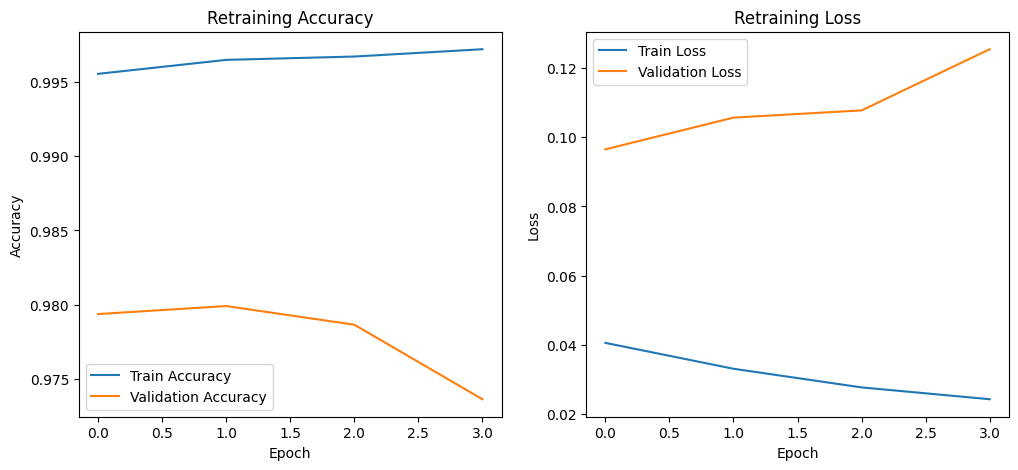

In [45]:
# Plot accuracy and loss for retraining
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_retraining.history['accuracy'], label='Train Accuracy')
plt.plot(history_retraining.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Retraining Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_retraining.history['loss'], label='Train Loss')
plt.plot(history_retraining.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Retraining Loss')
plt.legend()

plt.show()

In [46]:
# Load and preprocess the final test set
test_data = pd.read_csv('/content/drive/MyDrive/clickbits/clickbait_data.csv')

In [47]:
# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

In [48]:
test_data['headline'] = test_data['headline'].apply(preprocess_text)
X_test_final = test_data['headline']
y_test_final = test_data['clickbait']
y_test_final = label_encoder.transform(y_test_final)


In [49]:
X_test_final_seq = tokenizer.texts_to_sequences(X_test_final)
X_test_final_padded = pad_sequences(X_test_final_seq, maxlen=100)

In [50]:
# Evaluate the model on the final test set
test_loss_final, test_accuracy_final = model.evaluate(X_test_final_padded, y_test_final)
print(f"Final Test accuracy: {test_accuracy_final}")

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.9894 - loss: 0.0617
Final Test accuracy: 0.9870625138282776


In [51]:
# Predict on the final test set
y_test_final_pred_probs = model.predict(X_test_final_padded)
y_test_final_pred = (y_test_final_pred_probs > 0.5).astype(int).flatten()

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step


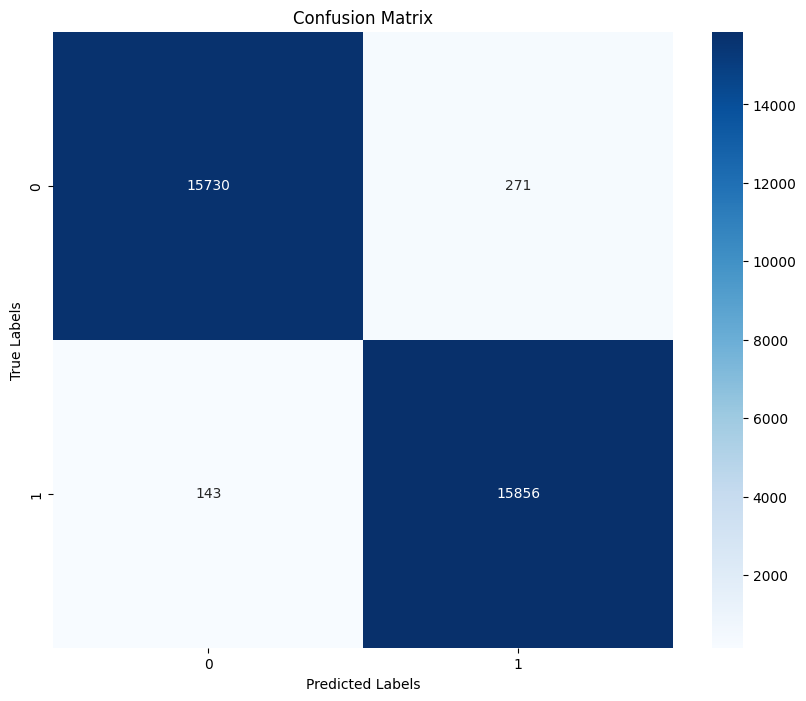

In [52]:
# Compute the confusion matrix for the final test set
conf_matrix_final = confusion_matrix(y_test_final, y_test_final_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_final, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [53]:
# Save the model to an HDF5 file
model.save('verity function4_new.h5')



In [64]:
import pickle
with open('function4_tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

test the model

In [65]:
from tensorflow.keras.models import load_model

# Load the model from an HDF5 file
loaded_model = load_model('/content/verity function4_new.h5')


In [68]:
# Example test data
test_data = ["This Simple Trick Will Change Your Life Forever!","A Comprehensive Guide to Understanding Climate Change","How to Make a Classic Spaghetti Carbonara","Doctors Are Furious About This One Weird Trick!","10 Shocking Secrets About Celebrities That Will Leave You Speechless!","She Did This Every Morning, and Now She Looks 20 Years Younger!","The Real Reason Why Everyone is Quitting Their Jobs!","What This Dog Did Will Make You Cry!","Find Out Which Foods Are Secretly Destroying Your Health!","This One Photo Will Change Your Perspective on Life!"]
test_data1 = ["Josh Hull to Make England Debut In Third Cricket Test"]
# Tokenize and pad the test data
tokenizer = Tokenizer(num_words=5000)  # Use the same num_words as in training
# Assuming tokenizer has been fit on training data
test_sequences = tokenizer.texts_to_sequences(test_data1)
test_padded = pad_sequences(test_sequences, maxlen=max_sequence_length)

In [69]:
# Predict on the test data
predictions = loaded_model.predict(test_padded)

# Convert probabilities to binary outcomes (for binary classification)
predicted_classes = (predictions > 0.5).astype(int)

# Print predictions
for i, text in enumerate(test_data1):
    print(f"Text: {text}")
    print(f"Predicted class: {predicted_classes[i][0]}")
    print(f"Prediction probability: {predictions[i][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Text: Josh Hull to Make England Debut In Third Cricket Test
Predicted class: 1
Prediction probability: 0.7279656529426575
